<a href="https://colab.research.google.com/github/alisyanisrinaaa/Checkpoint-DataMining/blob/main/Checkpoint-(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Shopping Trends Data**

#**Import Library**

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Algoritma C4.5
from sklearn.preprocessing import StandardScaler

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari dataset ini adalah untuk menganalisis kepuasan pelanggan dan tren terkini dalam berbelanja. Fokus dari analisis ini adalah untuk memahami perilaku pelanggan, merancang strategi pemasaran yang lebih efektif, meningkatkan pengalaman pelanggan, membuat keputusan yang tepat dan lebih baik dalam pengelolaan stok dan operasional, serta mengoptimalkan metode pembayaran yang akan ditawarkan sesuai dengan preferensi pelanggan. Strategi pemasaran akan disesuaikan dengan tren dan preferensi pelanggan, sedangkan inovasi produk dan layanan bertujuan untuk memenuhi kebutuhan pasar yang terus berkembang. Pencapaian tujuan ini diharapkan akan menciptakan hasil finansial yang kuat dan berkelanjutan dan memberikan manfaat yang bekerlanjutan untuk semua pihak.

##**Assess Situation**

Dalam melihat kondisi bisnis saat ini, perusahaan tahu bahwa data preferensi pelanggan sangat berharga, tetapi perlu dipastikan kembali keakuratannya. Perusahaan sadar akan pentingnya mengikuti tren pasar dan strategi pesaing untuk menjaga relevansi produk perusahaan. Evaluasi terus menerus dilakukan untuk menambah efektivitas strategi pemasaran dan layanan pelanggan untuk meningkatkan kepuasan pelanggan. Perusahaan akan menyesuaikan kebijakan dan operasioanl untuk mengikuti faktor ekonomi dan regulasi. Pengelolaan stok akan dioptimalkan berdasarkan analisis data, dan keamanan transaksi akan lebih diperkuat.

##**Data Mining Goals**

Goals dari analisis data ini adalah untuk mengidentifikasi pola pembelian pelanggan yang mencerminkan korelasi antara produk, membantu perusahaan untuk memahami hubungan dan kombinasi yang sedang terjadi. Lalu, perusahaan akan fokus pada segmentasi pelanggan dengan mengelompokkan pelanggan berdasarkan pola pembelian mereka. Hal ini akan membantu perusahaan dalam merancang strategi pemasaran yang lebih terfokus dan personalisasi. Selain itu, perusahaan akan menerapkan sistem rekomendasi untuk meningkatkan pengalaman pelanggan melalui penawaran produk yang lebih relevan dan disesuaikan dengan kebutuhan pelanggan. Dengan analisis ulasan dan penilaian produk, perusahaan berharap dapat memahami pandangan pelanggan mengenai produknya. Dengan mencapai tujuan-tujuan ini, perusahaan berharap dapat mengoptimalkan operasional bisnis dan memberi nilai tambah yang lebih besar bagi pelanggan.

##**Project Plan**

Rencana proyek untuk menganalisis dataset ini dimulai dengan mengumpulkan data dari sumber yang tersedia, termasuk memastikan keakuratan dataset pilihan pelanggan. Kemudian, data tersebut akan dikelompokkan berdasarkan pola pembelian, memeriksa korelasi antar produk, dan menerapkan sistem rekomendasi untuk mempersonalisasi penawaran. Evaluasi strategi pemasaran akan dilakukan untuk mengukur efektivitasnya, dan analisis sentimen dari ulasan pelanggan akan memberikan wawasan terhadap persepsi produk. Fokus pada penerapan strategi baru dan pengembangan produk untuk meningkatkan kinerja bisnis. Proses pemantauan dan pengembangan berkelanjutan dilakukan untuk menyesuaikan strategi dengan perubahan tren dan kebutuhan pasar. Keamanan data dan privasi pelanggan akan menjadi prioritas di setiap tahapan proyek ini.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Sumber Dataset : https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset



In [125]:
df = pd.read_csv('https://raw.githubusercontent.com/alisyanisrinaaa/Checkpoint-DataMining/main/shopping_trends.csv')

In [126]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


##**Describe Data**

####Informasi Dasar

In [127]:
jumlah_baris, jumlah_kolom = df.shape

print(f"Jumlah Baris : {jumlah_baris} Baris")
print(f"Jumlah Kolom : {jumlah_kolom} Kolom")

Jumlah Baris : 3900 Baris
Jumlah Kolom : 19 Kolom


Pada dataset ini terdapat 3900 baris dan 19 kolom

####Informasi Lanjutan

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

Pada dataset ini terdapat 19 kolom dengan nama kolom dan tipe data kolom yang berbeda. Berikut adalah penjelasannya :    
1. **Customer ID** : ID unik untuk setiap pelanggan dan memiliki tipe data integer.
2. **Age** : Usia pelanggan dan memiliki tipe data integer.
3. **Gender** : Jenis kelamin setiap pelanggan dan memiliki tipe data string.
4. **Item Purchased** : Barang yang dibeli oleh pelanggan dan memiliki tipe data string.
5. **Category** : Kategori produk dari item yang telah dibeli oleh pelanggan dan memiliki tipe data string.
6. **Purchase Amount (USD)** : Jumlah uang yang dikeluarkan oleh pelanggan untuk melakukan pembelian (menggunakan Dolar Amerika) dan memiliki tipe data integer.
7. **Location** : Lokasi pembelian atau pengiriman dan memiliki tipe data string.
8. **Size** : Ukuran barang yang dibeli dan memiliki tipe data string.
9. **Color** : Warna barang yang dibeli dan memiliki tipe data string.
10. **Season** : Musim pembelian dan memiliki tipe data string.
11. **Review Rating** : Penilaian pelanggan terhadap suatu produk atau layanan dan memiliki tipe data float.
12. **Subscription Status** : Status langganan pelanggan (berlangganan atau tidak) dan memiliki tipe data string.
13. **Payment Method** : Metode pembayaran yang digunakan pelanggan dan memiliki tipe data string.
14. **Shipping Type** : Jenis pengiriman yang dipilih oleh pelanggan dan memiliki tipe data string.
15. **Discount Applied** : Apakah diskon diterapkan atau tidak dan memiliki tipe data string.
16. **Promo Code Used** : Apakah pelanggan menggunakan kode promo atau tidak dan memiliki tipe data string.
17. **Previous Purchases** : Jumlah pembelian sebelumnya oleh pelanggan dan memiliki tipe data integer.
18. **Preferred Payment Method** : Metode pembayaran yang lebih disukai oleh pelanggan dan memiliki tipe data string.
19. **Frequency of Purchases** : Seberapa sering pelanggan melakukan pembelian dan memiliki tipe data string.

Jadi, kesimpulannya adalah terdapat **1 tipe data float, 4 tipe data integer, dan 14 tipe data string.**

####Informasi Statistik Deskriptif

In [129]:
df.describe().round(2)

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.00,3900.00,3900.00,3900.00,3900.00
mean,1950.50,44.07,59.76,3.75,25.35
std,1125.98,15.21,23.69,0.72,14.45
min,1.00,18.00,20.00,2.50,1.00
25%,975.75,31.00,39.00,3.10,13.00
50%,1950.50,44.00,60.00,3.70,25.00
75%,2925.25,57.00,81.00,4.40,38.00
max,3900.00,70.00,100.00,5.00,50.00


Berikut adalah penjelasan untuk nilai statistika deskriptif pada dataset ini:
1. **Customer ID :**
 *   Count : Jumlah total baris dalam dataset mencerminkan jumlah pelanggan, yakni 3900 pelanggan.

2. **Age :**
  * Mean : Rata-rata usia pelanggan dalam dataset adalah 44 tahun.
  * Std : Standar deviasi usia pelanggan, mengukur sejauh mana nilai usia tersebar dari rata-rata, yakni 15 tahun.
  * Min : Usia minum pelanggan dalam dataset, yakni 18 tahun.
  * 25% : Nilai usia dibawah 25% pelanggan, yakni 31 tahun.
  * 50% : Median atau nilai tengah usia pelanggan, yakni 44 tahun.
  * 75% : Nilai usia dibawah 75% pelanggan, yakni 57 tahun.
  * Max : Usia maksimum pelanggan dalam dataset, yakni 70 tahun.

3. **Purchases Amount (USD) :**
  * Mean : Rata-rata jumlah pembelian pelanggan pada dataset adalah 59.8 USD.
  * Std : Standar deviasi dari jumlah pembelian, mengukur sejauh mana nilai-nilai pembelian tersebar dari rata-rata adalah 23.7 USD.
  * Min : Jumlah pembelian minimum adalah 20 USD.
  * 25% : Nilai pembelian dibawah 25% pelanggan adalah 39 USD.
  * 50% : Median atau nilai tengah pembelian adalah 60 USD.
  * 75% : Nilai pembelian di bawah 75% pelanggan adalah 81 USD.
  * Max : Jumlah pembelian maksimum adalah 100 USD.

4. **Review Rating :**
  * Mean : Rata-rata penilaian produk atau layanan yang diberikan oleh pelanggan adalah 3.75
  * Std : Standar deviasi dari nilai penilaian, mengukur sejauh mana penilaian tersebar dari rata-rata adalah 0.72
  * Min : Nilai penilaian minimum yang diberikan oleh pelanggan adalah 2.5
  * 25% : Nilai penilaian di bawah 25% pelanggan adalah 3.1
  * 50% : Median atau nilai tengah penilaian adalah 3.7
  * 75% : Nilai penilaian di bawah 75% pelanggan adalah 4.4
  * Max : Nilai penilaian maksimum yang diberikan oleh pelanggan adalah 5.0

5. **Previous Purchases :**
  * Mean : Rata-rata jumlah pembelian sebelumnya yang telah dilakukan oleh pelanggan adalah 25.35
  * Std : Standar deviasi dari jumlah pembelian sebelumnya, mengukur sejauh mana nilai-nilai tersebut tersebar dari rata rata adalah 14.45
  * Min : Jumlah pembelian sebelumnya minimum 1
  * 25% : Nilai pembelian sebelumnya di bawah 25% pelanggan adalah 13.
  * 50% : Median atau nilai tengah pembelian sebelumnya adalah 25.
  * 75% : Nilai pembelian sebelumnya di bawah 75% pelanggan adalah 38.
  * Max : Jumlah pembelian sebelumnya maksimum 50.





##**Exploratory Data Analysis**

<Axes: ylabel='Gender'>

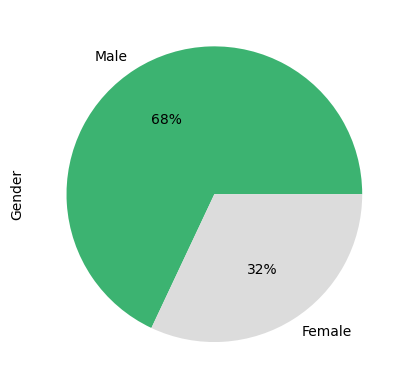

In [130]:
fig, ax = plt.subplots()
gender_counts = df['Gender'].value_counts()

colors = {'Female' : 'gainsboro', 'Male' : 'mediumseagreen'}
gender_counts.plot(kind='pie', autopct='%0.0f%%', startangle=360, colors=[colors[k] for k in gender_counts.index])

Customer Shopping Trends Data adalah cara kita memahami kebiasaan belanja pelanggan. Dari visualisasi ini menunjukkan diagram lingkaran yang terbagi menjadi 2 bagian, yaitu :
* **Bagian Hijau** : Persentase Pria, yaitu 68%
* **Bagian Abu-Abu** : Persentase Wanita, yaitu 32%

Berdasarkan informasi diatas dapat disimpulkan bahwa **Mayoritas** pelanggan adalah **Pria** dengan persentase 68% dan **Minoritas** pelanggan adalah **Wanita** dengan persentase 32%

Solusi yang dapat dilakukan untuk meningkatkan presentase pelanggan wanita, seperti:
1. Memahami kebutuhan dan preferensi wanita. Disini kita dapat melakukan riset pasar terlebih dahulu untuk memahami apa yang dibutuhkan wanita dalam berbelanja.
2. Menawarkan produk dan layanan yang menarik wanita. Disini kita dapat memperluas pilihan produk yang sesuai dengan kebutuhan wanita dan tawarkan cuka layanan yang dapat meningkatkan pengalaman berbelanja wanita, seperti konsultasi.
3. Memanfaatkan influencer wanita. Jalin kerjasama dengan influencer wanita yang memiliki kredibilitas dan pengikut yang bantak di targer audience wanita. Gunakan influencer wanita untuk mempromosikan produk dan layanan perusahaan kepada audiens mereka.

<Axes: ylabel='Category'>

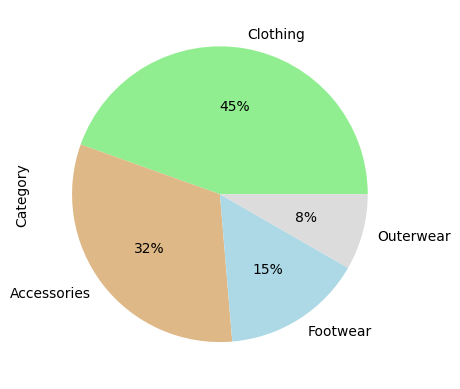

In [131]:
category_counts = df['Category'].value_counts()

colors = {'Clothing' : 'lightgreen', 'Accessories' : 'burlywood', 'Footwear' : 'lightblue', 'Outerwear' : 'gainsboro' }
category_counts.plot(kind='pie', autopct='%0.0f%%', startangle=360, colors=[colors[k] for k in category_counts.index])

Visualisasi ini menggambarkan persentase penjualan untuk setiap kategori dalam dataset customer shopping trends data. Visualisasi ini menggunakan pie chart yang terbagi menjadi 4 bagian, yaitu :
* **Bagian Hijau** : Persentase Clothing, yaitu 45%
* **Bagian Cokelat** : Persentase Accessories, yaitu 32%
* **Bagian Biru** : Persentas Footwear, yaitu 15%
* **Bagian Abu-Abu** : Persentase Outerwear, yaitu 8%

Berdasarkan informasi diatas dapat disimpulkan bahwa kategori **"Clothing"** merupakan kategori yang **paling populer**, terhitung sebesar 45% dari seluruh penjualan. Lalu disusul oleh Accessories sebesar 32%, Footwear sebesar 15%, dan Outerwear sebesar 8%.

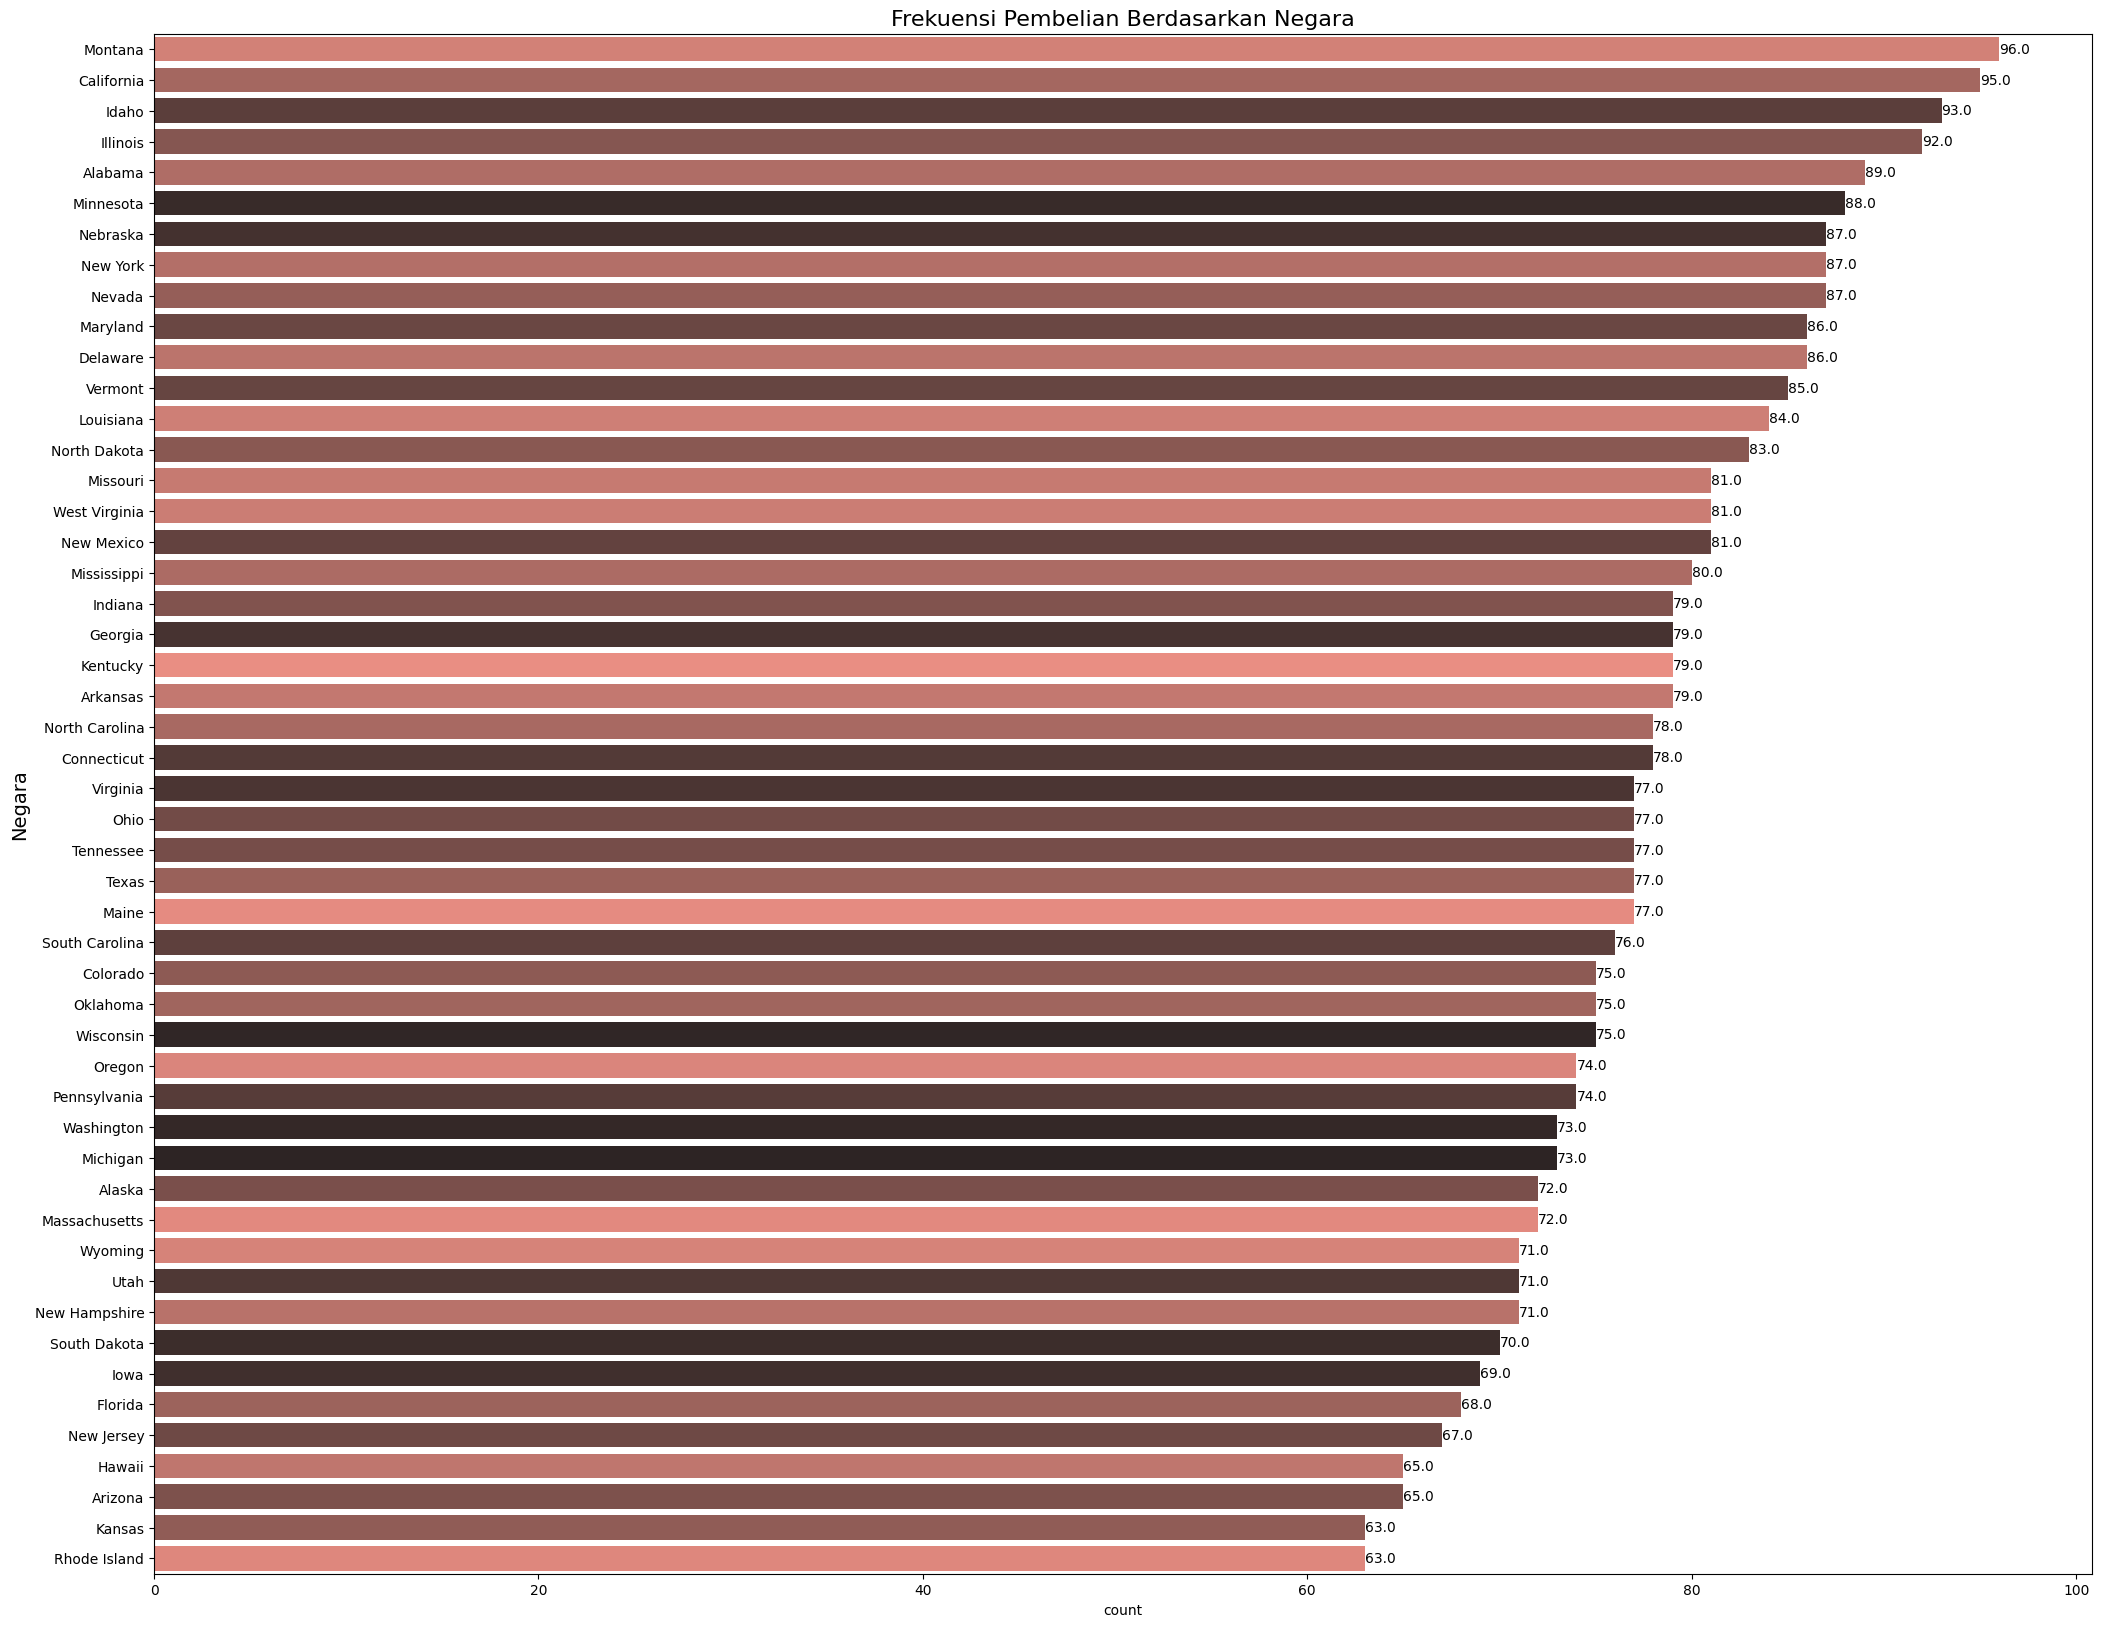

In [132]:
colors = sns.color_palette("dark:salmon_r", n_colors=len(df['Location'].unique()))

plt.figure(figsize=(25, 20))
ax = sns.countplot(y='Location', data=df, palette=colors, hue='Location', order=df['Location'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.title('Frekuensi Pembelian Berdasarkan Negara', fontsize=16)
plt.ylabel('Negara', fontsize=14)

plt.show()

Gambar diatas menunjukkan grafik yang menggambarkan frekuensi pembelian pelanggan di berbagai lokasi di Amerika Serikat. Dari grafik diatas dapat disimpulkan bahwa:
* **Frekuensi Pembelian Tertinggi** berada di negara bagian Barat dan Timur Laut Amerika Serikat. Hal ini dapat disebabkan oleh beberapa faktor, seperti kepadatan penduduk, tingkat pendapatan, dan akses ke toko retail.
* **Frekuensi Pembelian Terendah** berada di negara bagian Selatan dan Midwest Amerika Serikat. Hal ini disebabkan oleh beberapa faktor, seperti kepadatan penduduk yang lebih rendah, tingkat pendapatan yang lebih rendah, dan akses yang lebih terbatas ke toko retail.
* Dari sini kita dapat mengamati mengenai pola regionalnya. Misalnya negawa bagian di bagian Barat memiliki frekuensi pembelian yang tinggi, sedangkan negara bagian di bagian Selatan memiliki pembelian yang rendah.

Berdasarkan grafik frekuensi diatas, berikut beberapa solusi untuk meningkatkan frekuensi pembelian di negara bagian yang memiliki tingkat pembelian yang rendah :
1. Membuka toko retail baru di daerah dengan akses terbatas, terutama di daerah terpencil dan pedesaan.
2. Menawarkan layanan online dan mobile shopping yang mudah diakses oleh pelanggan.
3. Mengadakan acara dan promo yang menarik pelanggan didaerah tersebut.
4. Melakukan riset pasar untuk memahami kebutuhan pelanggan di daerah tersebut dan menawarkan produk dan layanan yang sesuai dengan kebutuhan pelanggan di daerah tersebut.
5. Bekerja sama dengan toko lokal untuk menyediakan produk dan layanan


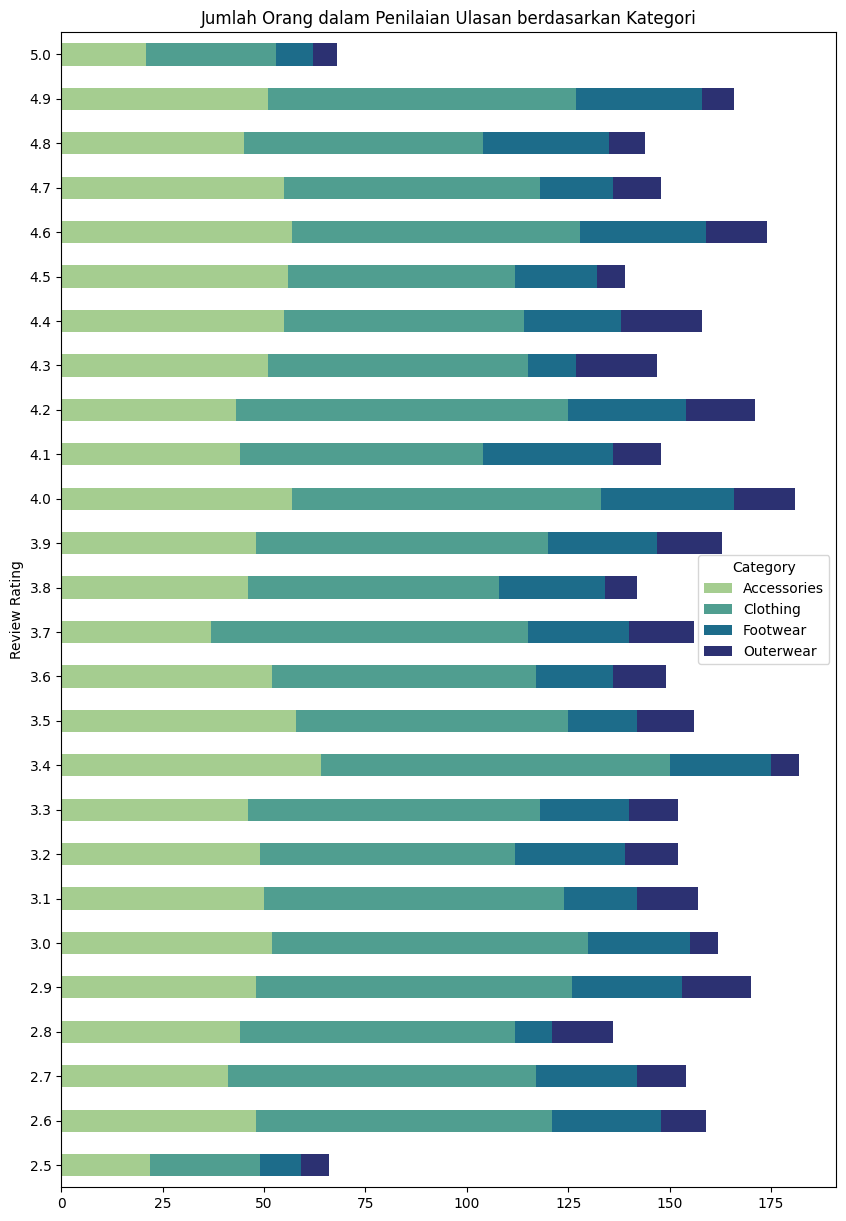

In [133]:
pivot_table = df.pivot_table(index='Review Rating', columns='Category', aggfunc='size', fill_value=0)

pivot_table.plot(kind='barh', stacked=True, colormap='crest', figsize=(10, 15))

plt.ylabel('Review Rating')
plt.title('Jumlah Orang dalam Penilaian Ulasan berdasarkan Kategori')
plt.show()

Berdasarkan informasi dari grafik batang diatas, dapat disimpulkan bahwa :
* Kategori Clothing memiliki jumlah ulasan terbanyak secara keseluruhan, lalu diikuti oleh Accessories, Footwear, dan Outerwear.
* Untuk semua kategori, rating terendah (2.5) memiliki jumlah pengulas paling sedikit, sedangkan rating di kisaran 3.0 hingga 4.0 memiliki jumlah pengulas paling banyak.
* Kategori Clothing memiliki distribusi ulasan yang paling beragam di antara semua kategori.
* Kategori Footwear memiliki tren penurunan yang cukup tajam pada rating di bawah 4.0

In [134]:
df.corr().round(4)

<ipython-input-134-5ebca4ea10ab>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Customer ID,1.0000,-0.0041,0.0110,0.0013,-0.0392
Age,-0.0041,1.0000,-0.0104,-0.0219,0.0404
Purchase Amount (USD),0.0110,-0.0104,1.0000,0.0308,0.0081
Review Rating,0.0013,-0.0219,0.0308,1.0000,0.0042
Previous Purchases,-0.0392,0.0404,0.0081,0.0042,1.0000


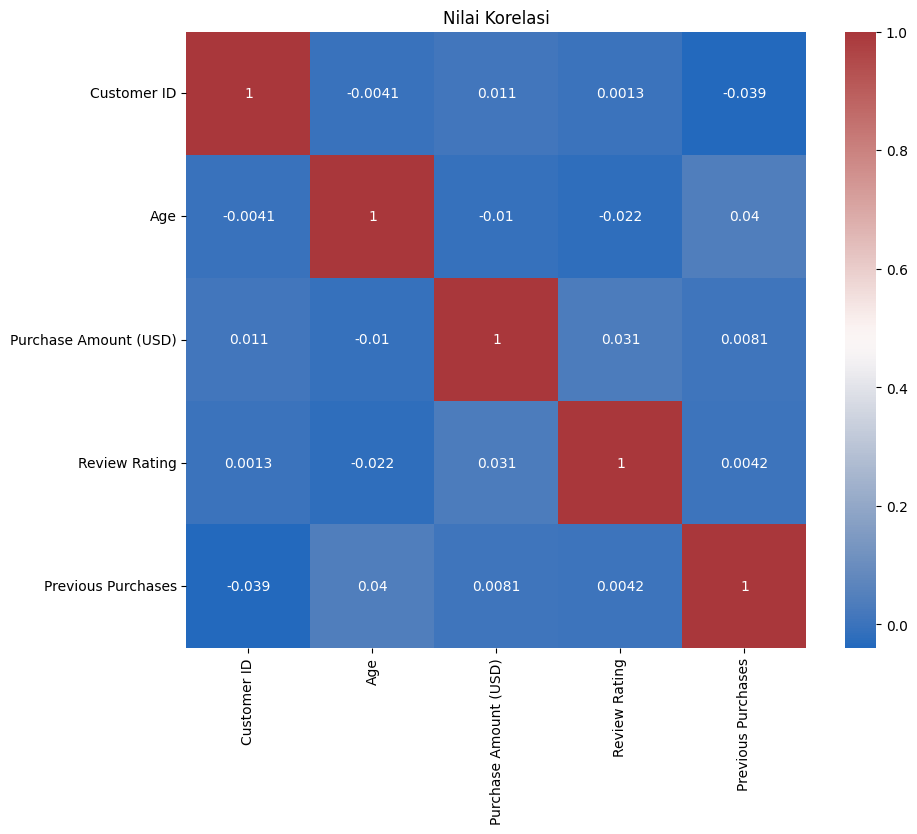

In [135]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='vlag')
plt.title('Nilai Korelasi')
plt.show()

**KORELASI**

**Keterangan :**
* Nlai di dalam kotak merupakan koefisien relasi antara dua variabel yang bersangkutan.
* Warna kotak menunjukkan arah hubungan:
  * **Biru** : Korelasi positif (Jika nilai satu variabel naik, maka nilai variabel lain juga naik).
  * **Merah** : Korelasi negatif (Jika nilai satu variabel naik, maka nilai variabel lain turun).
* Skala warna menunjukkan kekuatan hubungan:
  * **Warna Gelap** memiliki korelasi yang lebih kuat
  * **Warna Terang** memiliki korelasi yang lebih lemah

**Kesimpulan**
* Nilai korelasi antara **Customer ID dan Review Rating** adalah 0.013. Korelasi ini memiliki hubungan yang positif dan kekuatan yang sangat lemah. Artinya, Customer ID tidak dapat digunakan untuk memprediksi rating ulasan dengan akurat.
* Nilai korelasi antara **Customer ID dan Previous Purchases** adalah -0.039. Korelasi ini sangat lemah dan negatif. Artinya, Customer ID tidak dapat digunakan untuk memprediksi jumlah pembelian sebelumnya dengan akurat.
* Nilai korelasi antara **Age dan Review Rating** adalah -0.022. Korelasi ini sangat lemah dan negatif. Artinya, ketika usia meningkat, maka peringkat ulasan cenderung menurun.
* Nilai korelasi antara **Age dan Purchase Amount (USD)** adalah -0.01. Korelasi ini memiliki hubungan yang bernilai negatif dan menunjukkan kekuatan yang lemah. Artinya, ketika usia meningkat, jumlah pembelian (USD) cenderung menurun.
* Nilai korelasi antara **Purchase Amount (USD) dan Review Rating** adalah 0.031. Korelasi ini memiliki hubungan yang positif dan menunjukkan kekuatan yang lemah. Artinya, ketika jumlah pembelian (USD) meningkat, maka peringkat ulasan cenderung meningkat.
* Nilai korelasi antara **Purchase Amount (USD) dan Previous Purchases** adalah 0.0081. Korelasi ini memiliki hubungan yang positif dan menunjukkan kekuatan yang sangat lemah. Artinya, pelanggan yang telah membeli banyak di masa lalu tidak menunjukkan kecenderungan untuk membeli lebih banyak di masa depan.
* Nilai korelasi antara **Review Rating dan Previous Purchases**  adalah 0.0042. Korelasi ini memiliki hubungan yang positif dan menunjukkan kekuatan yang sangat lemah. Artinya, tidak ada hubungan yang signifikan antara kedua variabel ini.



##**Verify Data Quality**

####Missing Values

In [136]:
pd.DataFrame(df.isna().sum(), columns=['Jumlah Data Kosong'])

,Jumlah Data Kosong
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


Semua kolom pada dataset ini memiliki jumlah data kosong 0 yang berarti tidak ada data kosong.

In [137]:
df.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

Dapat dilihat dari hasil diatas tidak terdapat nilai NaN di kolom mana pun sehingga tidak ada kolom yang berisi data kosong.

Berdasarkan hasil analisis sementara di atas, dapat ditarik sebuah kesimpulan bahwa data tersebut memiliki kualitas yang sangat baik, dikarenakan tidak ada data yang kosong.

####Outliers Values

In [138]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Nama Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Nama Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Nama Kolom', axis=1)

display(results_df)

Nama Kolom,Persentase Outliers
Customer ID,0.0
Age,0.0
Purchase Amount (USD),0.0
Review Rating,0.0
Previous Purchases,0.0


Pada setiap kolom, persentase outlier dilaporkan sebagai 0,0%. Artinya, tidak ada titik data yang dianggap outlier dalam kolom-kolom ini berdasarkan kriteria atau metode yang digunakan untuk deteksi outlier.

####Duplicated Values

In [139]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3895    False
3896    False
3897    False
3898    False
3899    False
Length: 3900, dtype: bool

Berdasarkan hasil analisis sementara di atas, dapat ditarik sebuah kesimpulan bahwa data tersebut memiliki kualitas yang sangat baik, dikarenakan tidak ada data yang terduplikasi.

####Inconsistent Values / Noise (Optional)

In [140]:
inconsistent_values_found = False

for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        inconsistent_values = df.loc[~pd.to_numeric(df[column], errors='coerce').notna(), column]
        if not inconsistent_values.empty:
            print(f"\nNilai {column} yang Tidak Sesuai:")
            print(inconsistent_values)
            inconsistent_values_found = True

if not inconsistent_values_found:
    print("\nTidak Ada Nilai yang Tidak Sesuai dalam Dataset.")


Tidak Ada Nilai yang Tidak Sesuai dalam Dataset.


Pada dataset ini tidak ada nilai yang dianggap inkonsisten. Jadi, semua nilai yang ada pada dataset ini berada dalam batas yang dianggap sesuai atau tidak ada yang melanggar aturan.

#**DATA PREPARATION**

##**Data Cleaning**

###**Penanganan Missing Values**

#####Pengecekkan Missing Values

In [141]:
print((df.isna().sum() / len(df) * 100))

Customer ID                 0.0
Age                         0.0
Gender                      0.0
Item Purchased              0.0
Category                    0.0
Purchase Amount (USD)       0.0
Location                    0.0
Size                        0.0
Color                       0.0
Season                      0.0
Review Rating               0.0
Subscription Status         0.0
Payment Method              0.0
Shipping Type               0.0
Discount Applied            0.0
Promo Code Used             0.0
Previous Purchases          0.0
Preferred Payment Method    0.0
Frequency of Purchases      0.0
dtype: float64


Dapat dilihat bahwa tidak terdapat nilai yang hilang / kosong, yang berarti pengumpulan data yang telah dilakukan berhasil karena lengkap dan konsisten.

#####Hapus Missing Value

Berdasarkan data yang diperoleh dari [Pengecekan Missing Value](#pengecekan-missing-value) tidak terdapat nilai yang hilang atau kosong, maka hal ini tidak perlu dilakukan.

#####Imputasi Missing Value

Berdasarkan data yang diperoleh dari [Pengecekan Missing Value](#pengecekan-missing-value) tidak terdapat nilai yang hilang atau kosong, maka hal ini tidak perlu dilakukan.

#####Pengecekkan Ulang

In [142]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
Customer ID,0.0
Age,0.0
Gender,0.0
Item Purchased,0.0
Category,0.0
Purchase Amount (USD),0.0
Location,0.0
Size,0.0
Color,0.0
Season,0.0


Setelah dilakukan pemeriksaan ulang, dapat dilihat bahwa tidak ditemukan nilai yang hilang/kosong.

###**Penanganan Duplicated Values**

#####Pengecekkan Nilai Duplikat

In [143]:
df[df.duplicated()]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases


Berdasarkan hasil di atas, terdapat baris kosong dalam setiap kolom. Artinya, tidak ada data yang terduplikasi.

#####Hapus Nilai Duplikasi

In [144]:
df = df.drop_duplicates()

Berdasarkan pengecekan nilai duplikat di atas, nilai yang terduplikat akan dihapus secara otomatis. Jika tidak ada nilai duplikat, maka tidak akan ada perubahan yang terjadi.

###**Penanganan Outliers**

#####Pengecekkan Outliers

In [145]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Customer ID,0.0
Age,0.0
Purchase Amount (USD),0.0
Review Rating,0.0
Previous Purchases,0.0


Berdasarkan hasil diatas, dapat dilihat bahwa kelima kolom tersebut memiliki nilai outliers sebesar **0.0**. Artinya, tidak ada data yang nilainya terlalu jauh dari nilai-nilai lainnya.

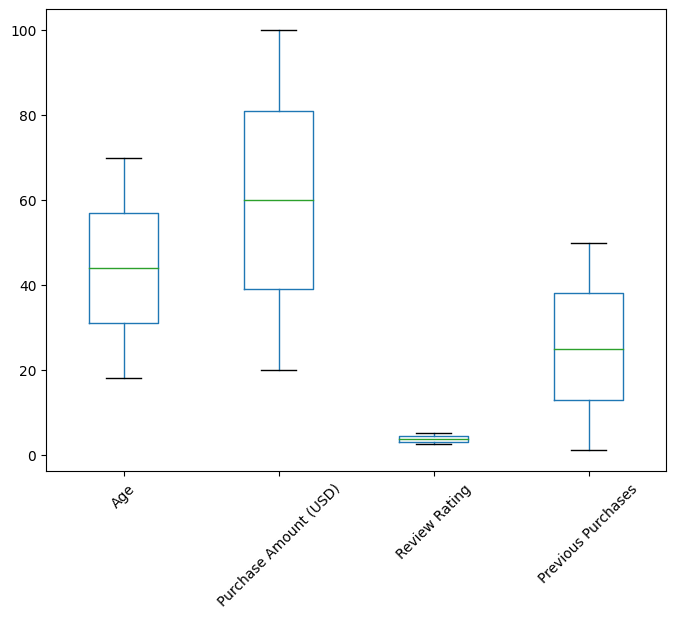

In [146]:
boxplot = df.drop('Customer ID', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

Dari grafik diatas, tidak ditemukan nilai yang jauh dari jangkauan.

#####Hapus Outliers

Berdasarkan data yang diperoleh dari [Pengecekan Outliers](#Pengecekkan-Outliers) tidak ditemukan nilainya terlalu jauh dari nilai-nilai lainnya.

#####Imputasi Outliers

Berdasarkan data yang diperoleh dari [Pengecekan Outliers](#Pengecekkan-Outliers) tidak ditemukan nilainya terlalu jauh dari nilai-nilai lainnya.

#####Pengecekkan Ulang

In [147]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df)

Kolom,Persentase Outliers
Customer ID,0.0
Age,0.0
Purchase Amount (USD),0.0
Review Rating,0.0
Previous Purchases,0.0


Setelah dilakukan pengecekkan ulang, tidak ditemukan nilai yang terlalu jauh dari nilai-nilai lainnya.

##**Construct Data**

####Melakukan Rekayasa Fitur (Feature Engineering)

In [148]:
def categorize_age(age):
    if age < 25:
        return 'Teens'
    elif 25 <= age < 45:
        return 'Adult'
    else:
        return 'Elderly'

df['Age Category'] = df['Age'].apply(categorize_age)

In [149]:
def spending_category(previous):
    if previous < 10:
        return 'Middle'
    elif 10 <= previous < 40:
        return 'Moderate'
    else:
        return 'Much'

df['Spending Category'] = df['Previous Purchases'].apply(spending_category)

####Pengecekkan Hasil

In [150]:
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age Category,Spending Category
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,Elderly,Moderate
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,Teens,Middle
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Elderly,Moderate
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,Teens,Much
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,Elderly,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,...,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly,Adult,Moderate
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,...,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,Elderly,Much
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,...,No,Credit Card,Standard,No,No,24,Venmo,Quarterly,Elderly,Moderate
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,...,No,PayPal,Express,No,No,24,Venmo,Weekly,Adult,Moderate


Berdasarkan data diatas, terdapat kolom baru yang bernama **Age Category** yang digunakan untuk menyimpan data sesuai dengan kategori usia dan **Spending Category** yang digunakan untuk menyimpan data sesuai dengan kategori pembelian sebelumnya.

##**Data Reduction**

####Mengurangi Fitur -Fitur yang Kurang Relevan

In [151]:
df2 = df.drop(['Subscription Status', 'Preferred Payment Method'], axis = 1)

Menghapus kolom **Subscription Status dan Preferred Payment Method** karena kurang relevan. Kolom tersebut dihapus karena untuk menyederhanakan analisis dan memusatkan perhatian kepada kolom-kolom yang lebih penting.

####Pengecekkan Hasil

In [152]:
df2

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,Age Category,Spending Category
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Credit Card,Express,Yes,Yes,14,Fortnightly,Elderly,Moderate
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Bank Transfer,Express,Yes,Yes,2,Fortnightly,Teens,Middle
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Cash,Free Shipping,Yes,Yes,23,Weekly,Elderly,Moderate
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,PayPal,Next Day Air,Yes,Yes,49,Weekly,Teens,Much
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Cash,Free Shipping,Yes,Yes,31,Annually,Elderly,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,Cash,2-Day Shipping,No,No,32,Weekly,Adult,Moderate
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,PayPal,Store Pickup,No,No,41,Bi-Weekly,Elderly,Much
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,Credit Card,Standard,No,No,24,Quarterly,Elderly,Moderate
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,PayPal,Express,No,No,24,Weekly,Adult,Moderate


Dapat dilihat pada tabel diatas bahwa kolom **Subscription Status dan Preferred Payment Method** yang tadinya ada, namun setelah dilakukan pemfilteran data kolom-kolom tersebut telah dihapus karena kurang relevan.

##**Data Transformation**

####Mapping

In [156]:
df2 ['Gender'] = df2['Gender'].map({'Male' : 0, 'Female' : 1})
df2 ['Category'] = df2['Category'].map({'Accessories' : 0, 'Clothing' : 1, 'Footwear' : 2, 'Outerwear' : 3 }).astype(int)
df2 ['Discount Applied'] = df2['Discount Applied'].map({'Yes' : 1, 'No' : 0})
df2 ['Promo Code Used'] = df2['Promo Code Used'].map({'Yes' : 1, 'No' : 0})

In [157]:
df2

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,Age Category,Spending Category
0,1,55,0,Blouse,1,53,Kentucky,L,Gray,Winter,3.1,Credit Card,Express,1,1,14,Fortnightly,Elderly,Moderate
1,2,19,0,Sweater,1,64,Maine,L,Maroon,Winter,3.1,Bank Transfer,Express,1,1,2,Fortnightly,Teens,Middle
2,3,50,0,Jeans,1,73,Massachusetts,S,Maroon,Spring,3.1,Cash,Free Shipping,1,1,23,Weekly,Elderly,Moderate
3,4,21,0,Sandals,2,90,Rhode Island,M,Maroon,Spring,3.5,PayPal,Next Day Air,1,1,49,Weekly,Teens,Much
4,5,45,0,Blouse,1,49,Oregon,M,Turquoise,Spring,2.7,Cash,Free Shipping,1,1,31,Annually,Elderly,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,1,Hoodie,1,28,Virginia,L,Turquoise,Summer,4.2,Cash,2-Day Shipping,0,0,32,Weekly,Adult,Moderate
3896,3897,52,1,Backpack,0,49,Iowa,L,White,Spring,4.5,PayPal,Store Pickup,0,0,41,Bi-Weekly,Elderly,Much
3897,3898,46,1,Belt,0,33,New Jersey,L,Green,Spring,2.9,Credit Card,Standard,0,0,24,Quarterly,Elderly,Moderate
3898,3899,44,1,Shoes,2,77,Minnesota,S,Brown,Summer,3.8,PayPal,Express,0,0,24,Weekly,Adult,Moderate


Pada hasil di atas dengan menggunakan mapping yang bertujuan untuk memberikan klasifikasi numerik yang dapat diproses oleh model. Berikut adalah penjelasannya :
1. Klasifikasi numerik kepada setiap jenis kelamin guna memudahkan analisis data. Dalam hal ini, jenis kelamin **"Male"** direpresentasikan dengan angka **0**, dan **"Female"** dengan angka **1**. Hal ini dilakukan untuk membantu dalam mengelompokkan data dan memahami distribusi jenis kelamin dalam dataset dengan lebih efisien.
2. Klasifikasi numerik kepada setiap jenis kategori guna memudahkan analisis data. Dalam hal ini, kategori **"Accessories"** direpresentasikan dengan angka **0**, **"Clothing"** dengan angka **1**, **"Footwear"** dengan angka **2**, dan **"Outerwear"** dengan angka **3**. Hal ini dilakukan untuk membantu dalam mengelompokkan data dan memahami distribusi jenis kategori dalam dataset dengan lebih efisien.
3. Klasifikasi numerik kepada setiap jenis penggunaan kode dan diskon guna memudahkan analisis data. Dalam hal ini, jika **"Yes"** direpresentasikan dengan angka **1**, dan **"No"** dengan angka **0**. Hal ini dilakukan untuk membantu dalam mengelompokkan data dan memahami distribusi penggunaan kode dan diskon dalam dataset dengan lebih efisien.


####Encoding

In [162]:
df2 = pd.get_dummies(df2)

In [165]:
df2.head()

,Customer ID,Age,Gender,Category,Purchase Amount (USD),Review Rating,Discount Applied,Promo Code Used,Previous Purchases,Item Purchased_Backpack,...,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly,Age Category_Adult,Age Category_Elderly,Age Category_Teens,Spending Category_Middle,Spending Category_Moderate,Spending Category_Much
0,1,55,0,1,53,3.1,1,1,14,0,...,1,0,0,0,0,1,0,0,1,0
1,2,19,0,1,64,3.1,1,1,2,0,...,1,0,0,0,0,0,1,1,0,0
2,3,50,0,1,73,3.1,1,1,23,0,...,0,0,0,1,0,1,0,0,1,0
3,4,21,0,2,90,3.5,1,1,49,0,...,0,0,0,1,0,0,1,0,0,1
4,5,45,0,1,49,2.7,1,1,31,0,...,0,0,0,0,0,1,0,0,1,0


Encoding digunakan untuk mengubah setiap kolom kategorikal menjadi satu set kolom biner (0 atau 1). Kolom baru ini akan mewakili setiap nilai unik dalam variabel kategorikal asli. Jika suatu baris memiliki nilai tertentu dalam variabel kategorikal, maka kolom yang sesuai dengan nilai tersebut akan memiliki nilai 1, sedangkan kolom-kolom lainnya akan memiliki nilai 0.

#**New Dataframe to CSV**

In [169]:
df2.to_csv('Data Cleaned.csv', index=False)